In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_w_lag.csv',header = 0)
features = ['Chl_current','Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_1m_lag'])
y = df["Chl_1m_lag"]

In [4]:
x.head()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,2.540000,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,3.759632,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,2.860000,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,3.692863,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,5.130000,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Chl_current',
 'Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [6]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [6]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [7]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error','poisson']:
        for max_depth in [10,50,100,200,400]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.8,0.9,1.0]:


                        RFR = RandomForestRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                    min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                   max_features = max_features)

                        RFR.fit(Xtrain,Ytrain)
                        score = RFR.score(Xtest,Ytest)
                        if score > best_score:
                            best_score = score
                            best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                              'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                               'max_features':max_features}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.432
Best parameters:{'n_estimators': 100, 'criterion': 'poisson', 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.8}


In [24]:
# RFR

# 1.Model
RFR = RandomForestRegressor(n_estimators=100, criterion='poisson', max_depth=50, min_samples_split=2, min_samples_leaf=8, max_features=0.6)

# 2.Train
RFR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = RFR.predict(Xtrain)
y_predict_xtest = RFR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.7327374043449238
R2 for test: 0.43876332893797276
MAE for train: 0.46720990594947415
MAE for test: 0.7461513785750433
MSE for train: 0.7977116304110673
MSE for test: 1.6259518124321295
MAPE for train 0.5367854248807364
MAPE for test 0.6254266936546122


In [231]:
RFR.fit(Xtrain,Ytrain)

RandomForestRegressor(criterion='poisson', max_depth=50, max_features=0.8,
                      min_samples_leaf=8)

In [232]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

52.77379085999249

In [25]:
importance = RFR.feature_importances_
print(importance)
print([*zip(features,RFR.feature_importances_)])

[0.53527571 0.01437087 0.0123315  0.02179601 0.01784465 0.0216285
 0.02839622 0.1053515  0.01603256 0.01625783 0.01340761 0.03642554
 0.02774209 0.13313941]
[('Chl_current', 0.5352757086065433), ('Ammonia Nitrogen', 0.014370870473839363), ('NOx', 0.012331497123608683), ('Dissolved Oxygen', 0.021796010747935916), ('pH', 0.01784464868648822), ('Water Temperature', 0.02162849954534779), ('Turbidity', 0.02839622465491792), ('Total Phosphorus', 0.10535150089030017), ('Air Temperature', 0.016032562784999385), ('Specific Humidity', 0.016257831873794187), ('Wind Speed', 0.0134076050568576), ('Precipitation', 0.03642553905389861), ('Shortwave Radiation Flux', 0.02774209404558523), ('Developed Percent', 0.1331394064558838)]


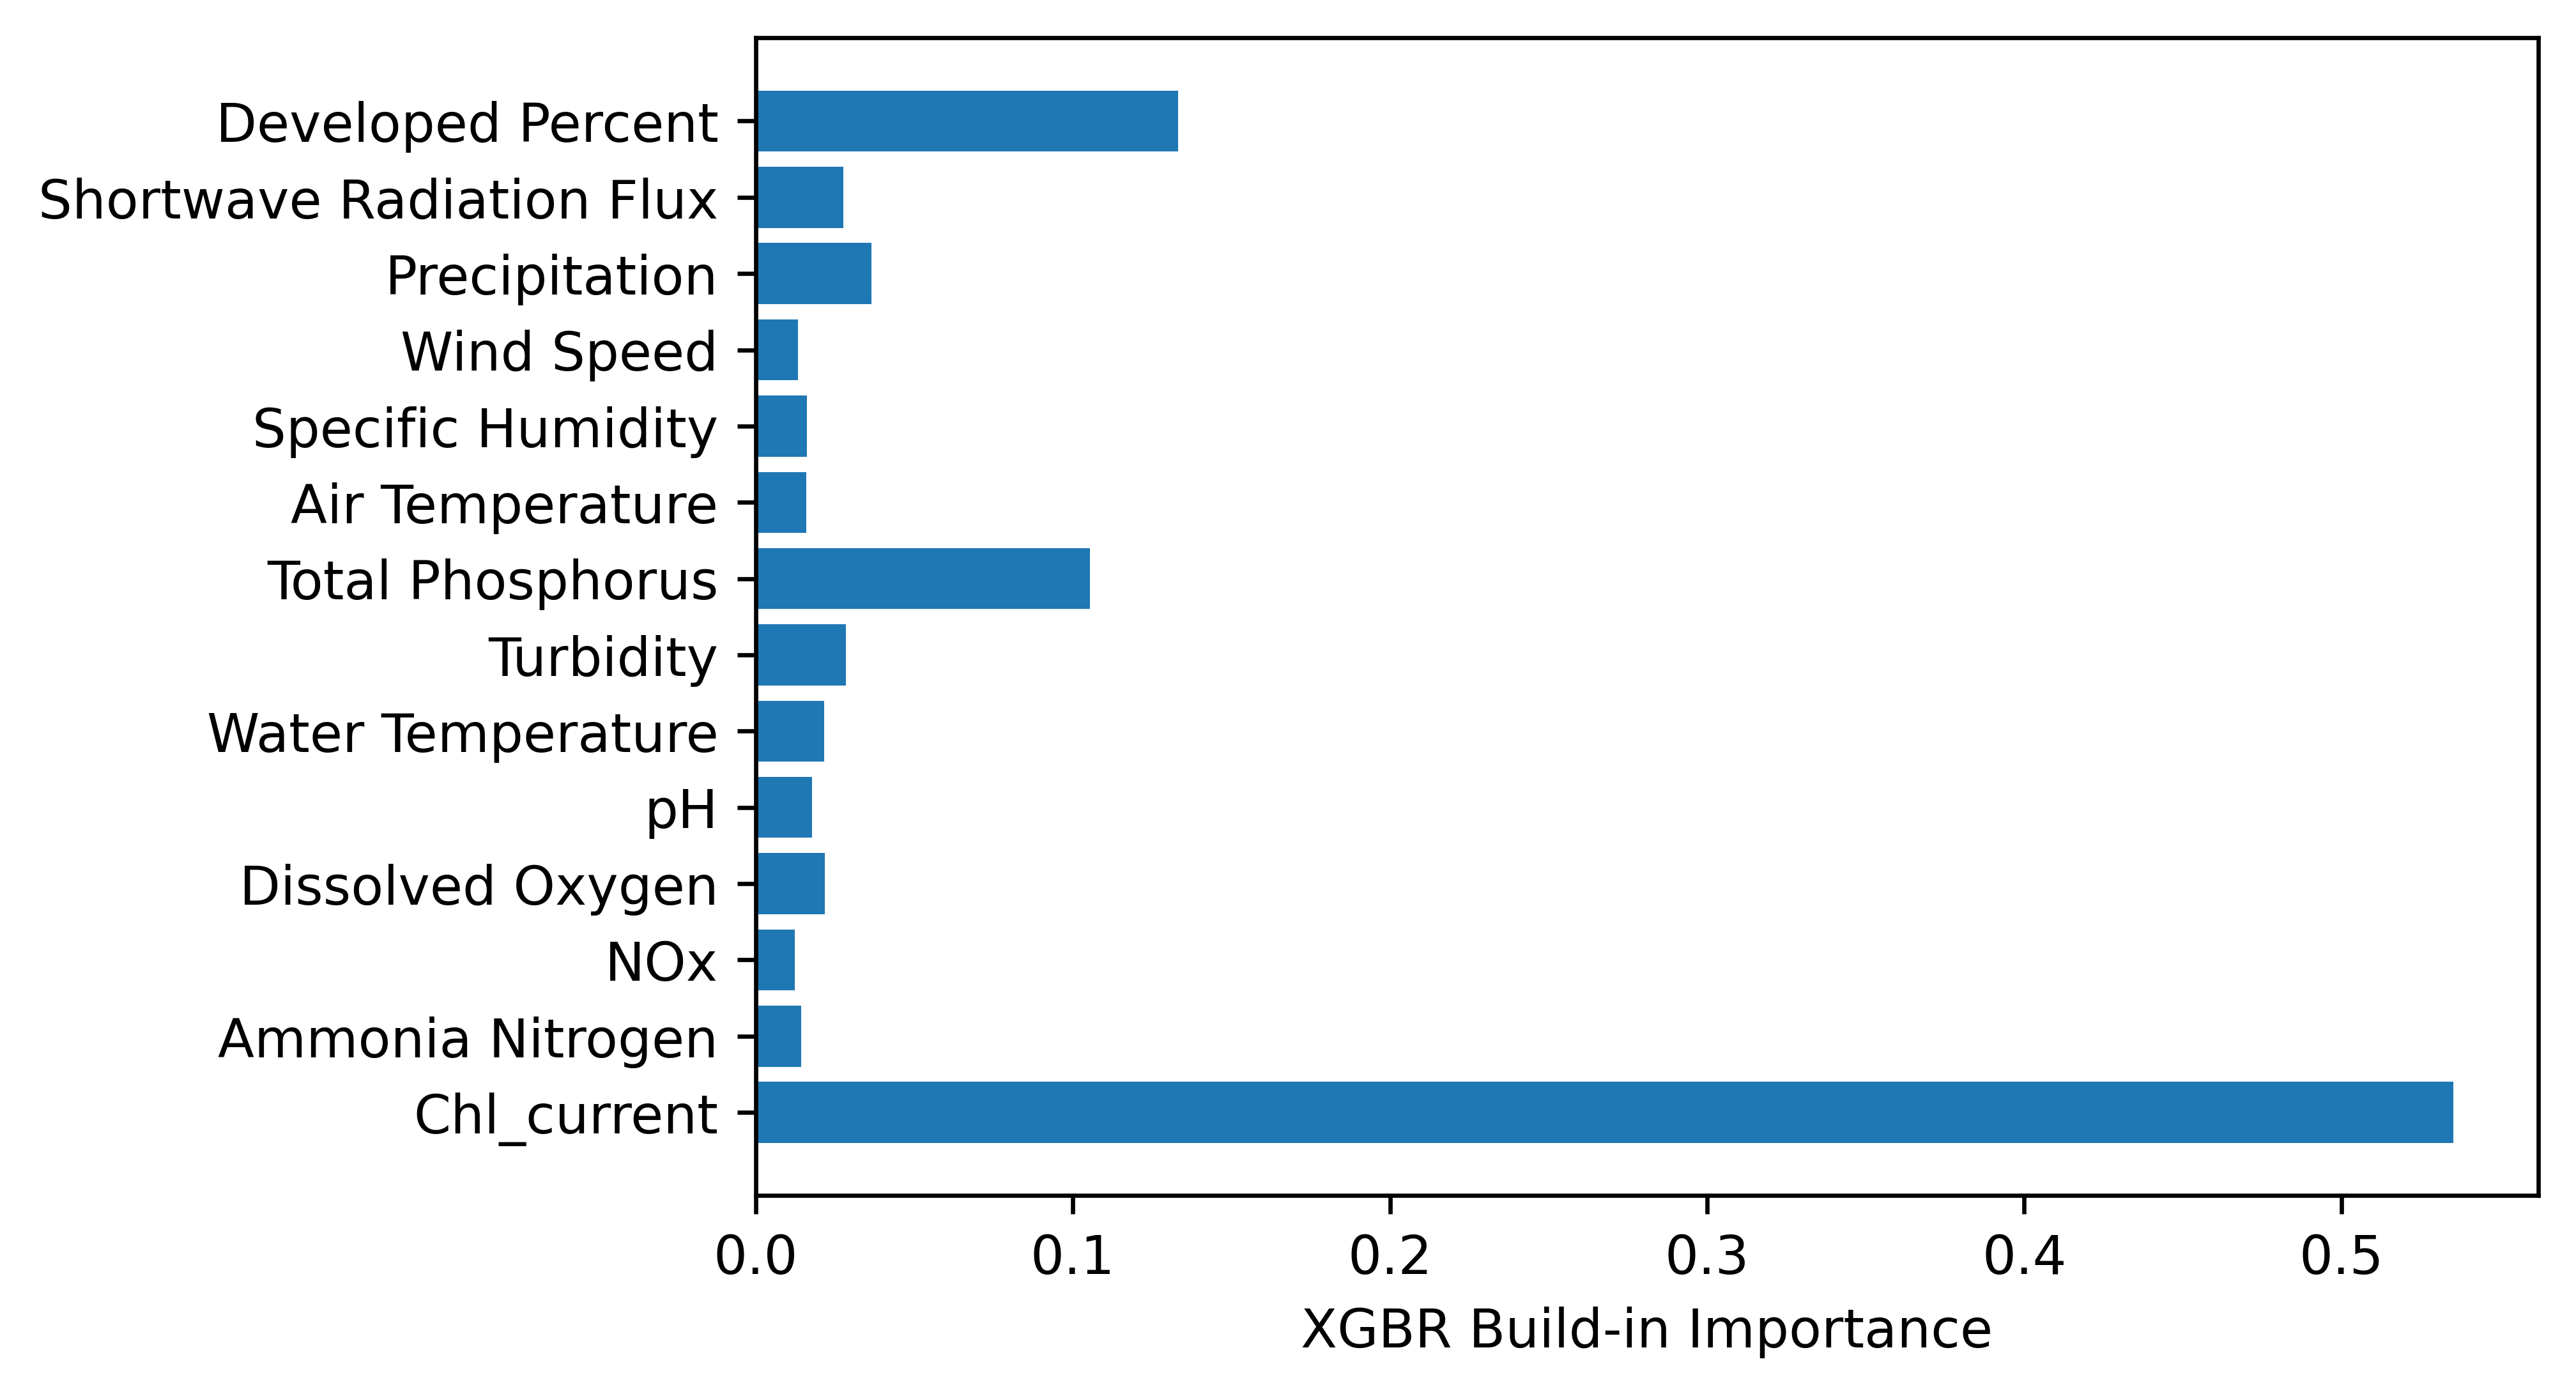

In [26]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = RFR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('XGBR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

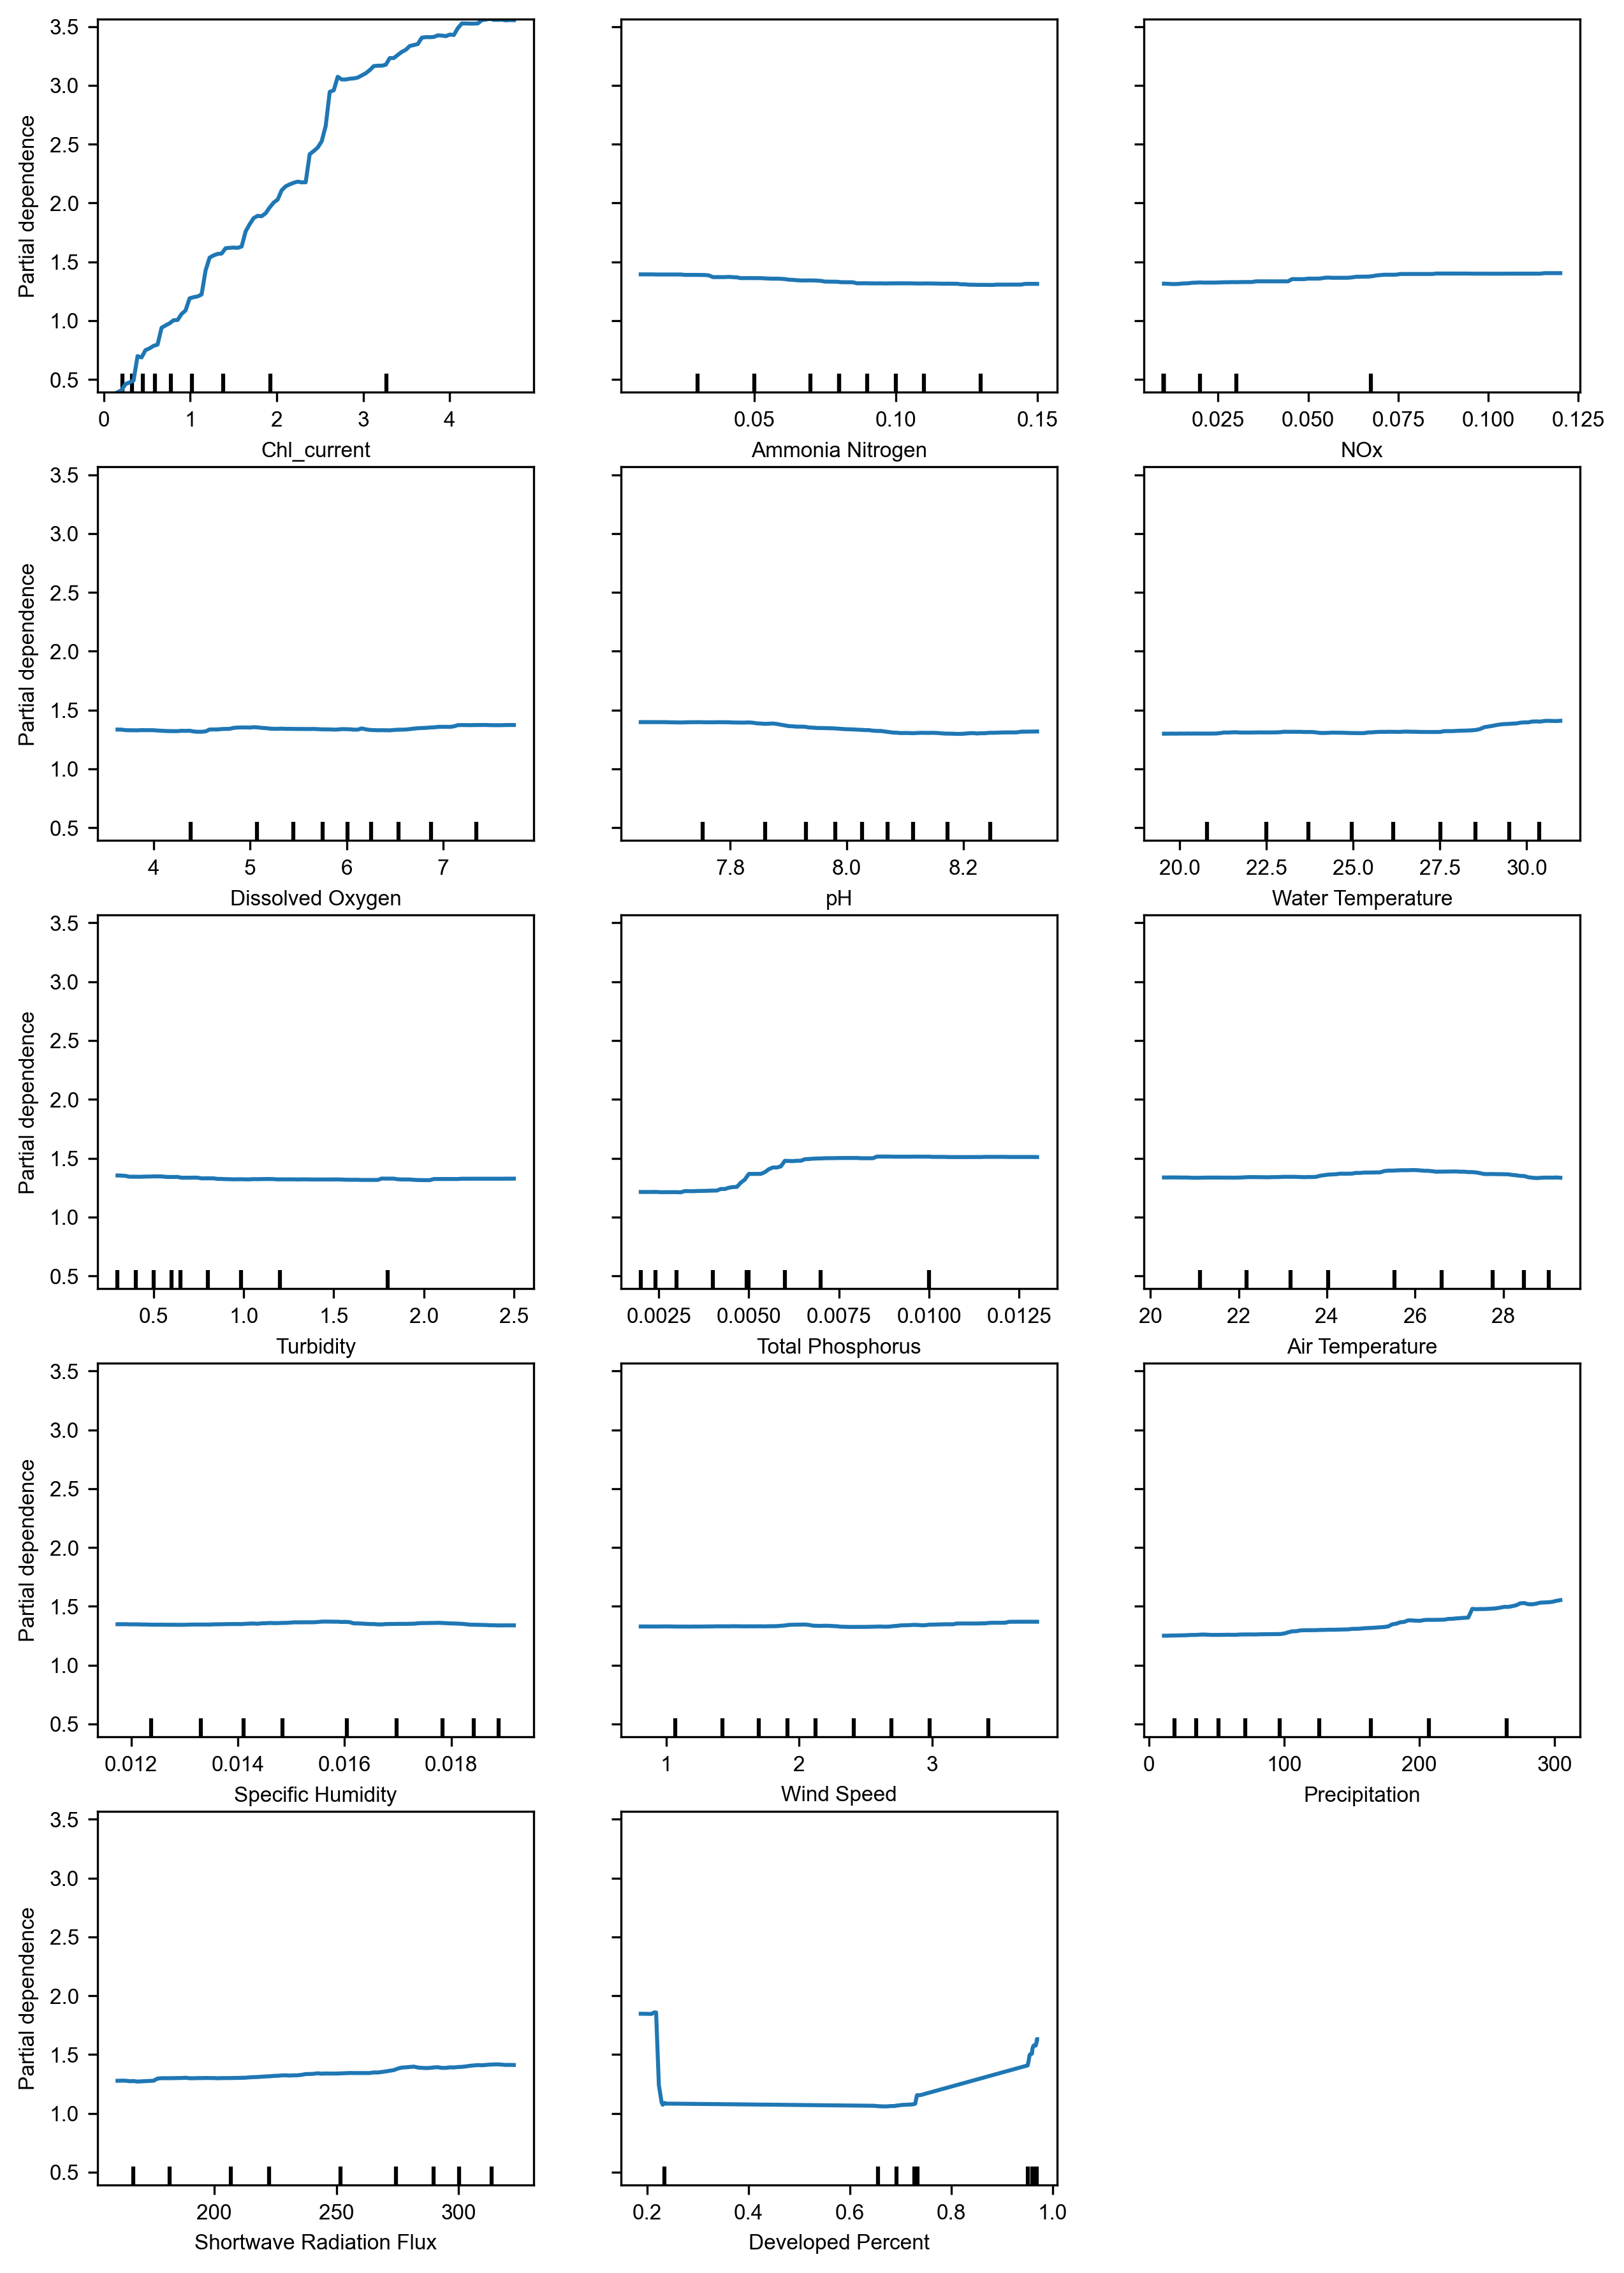

In [265]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(RFR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

[0.4024909  0.00154381 0.02119902 0.00564693 0.00342859 0.00688123
 0.00318647 0.02231443 0.00440971 0.00645299 0.00046012 0.03026037
 0.02097026 0.07962026]


Text(0.5, 0, 'XGBR Permutation Importance')

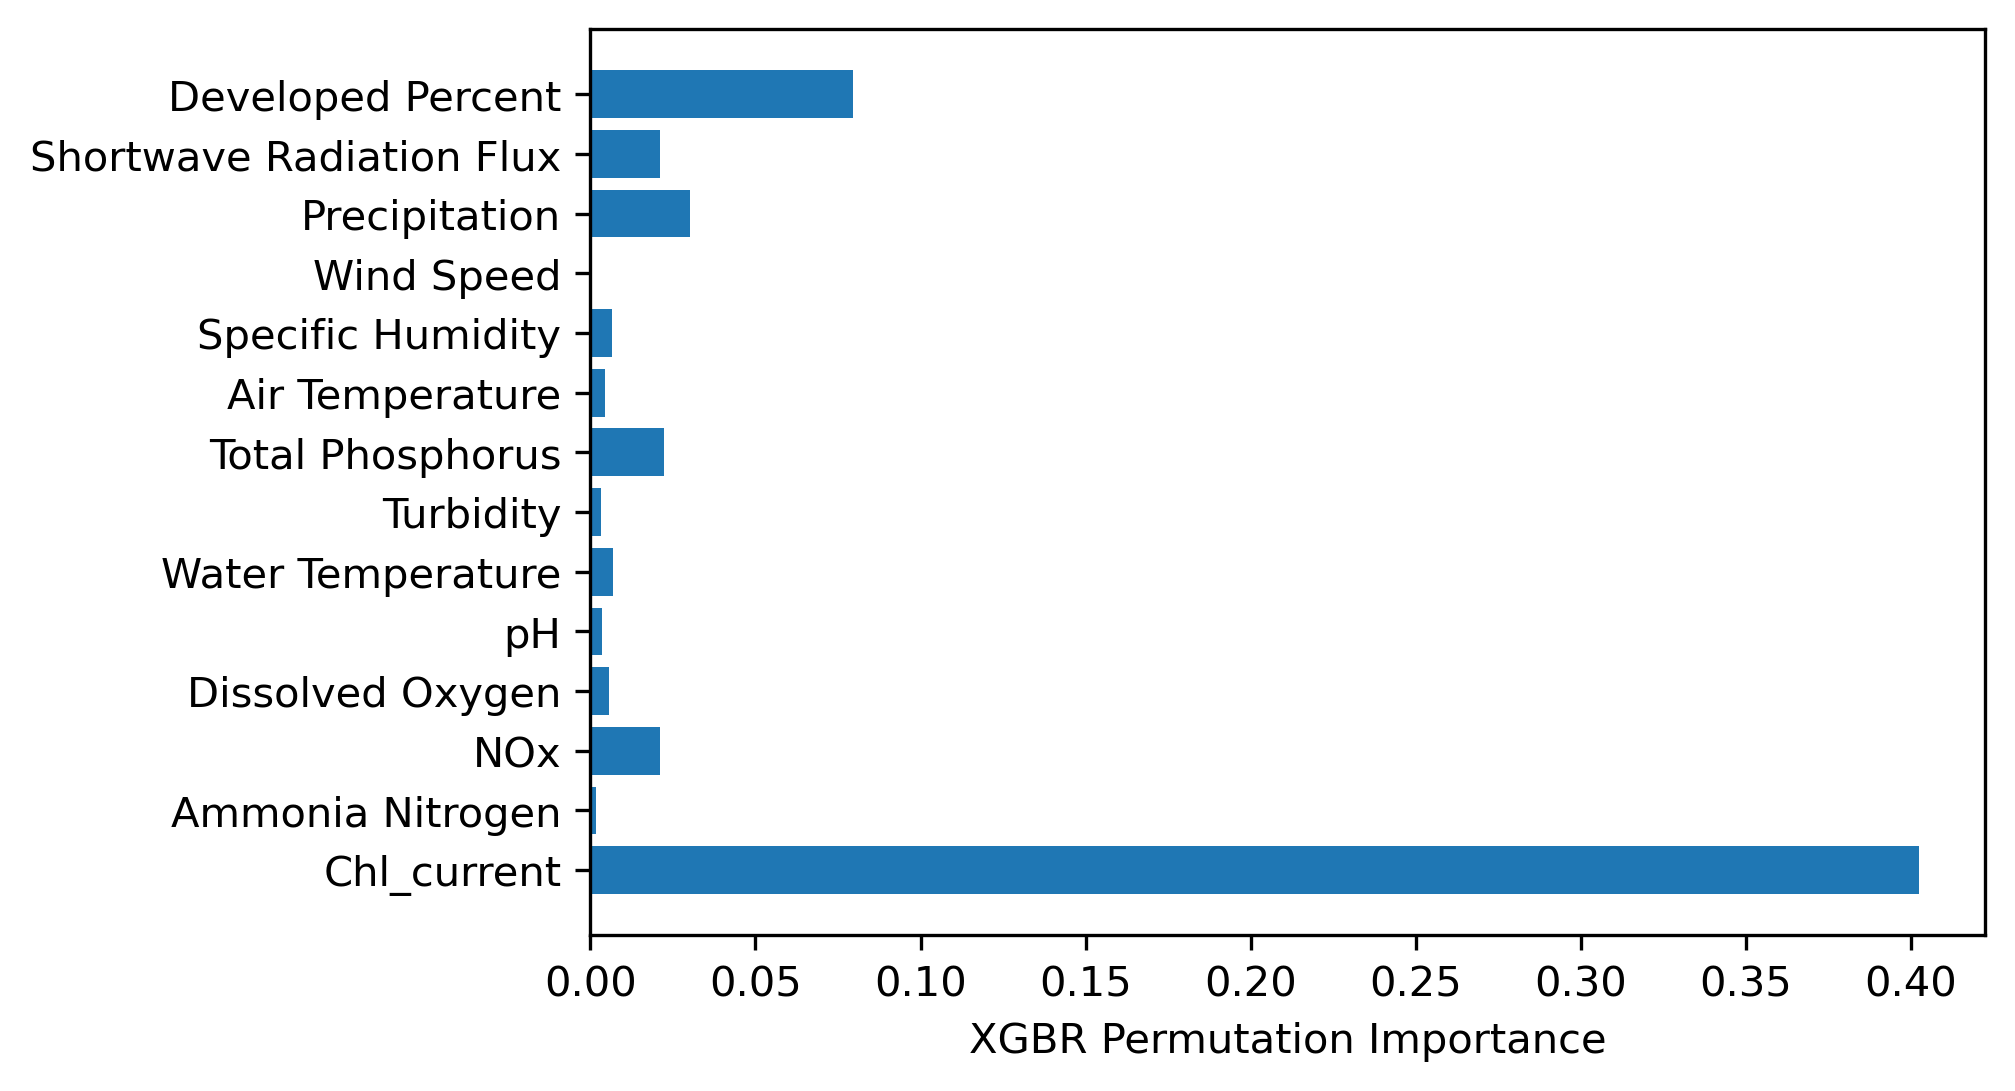

In [27]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(RFR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("XGBR Permutation Importance")

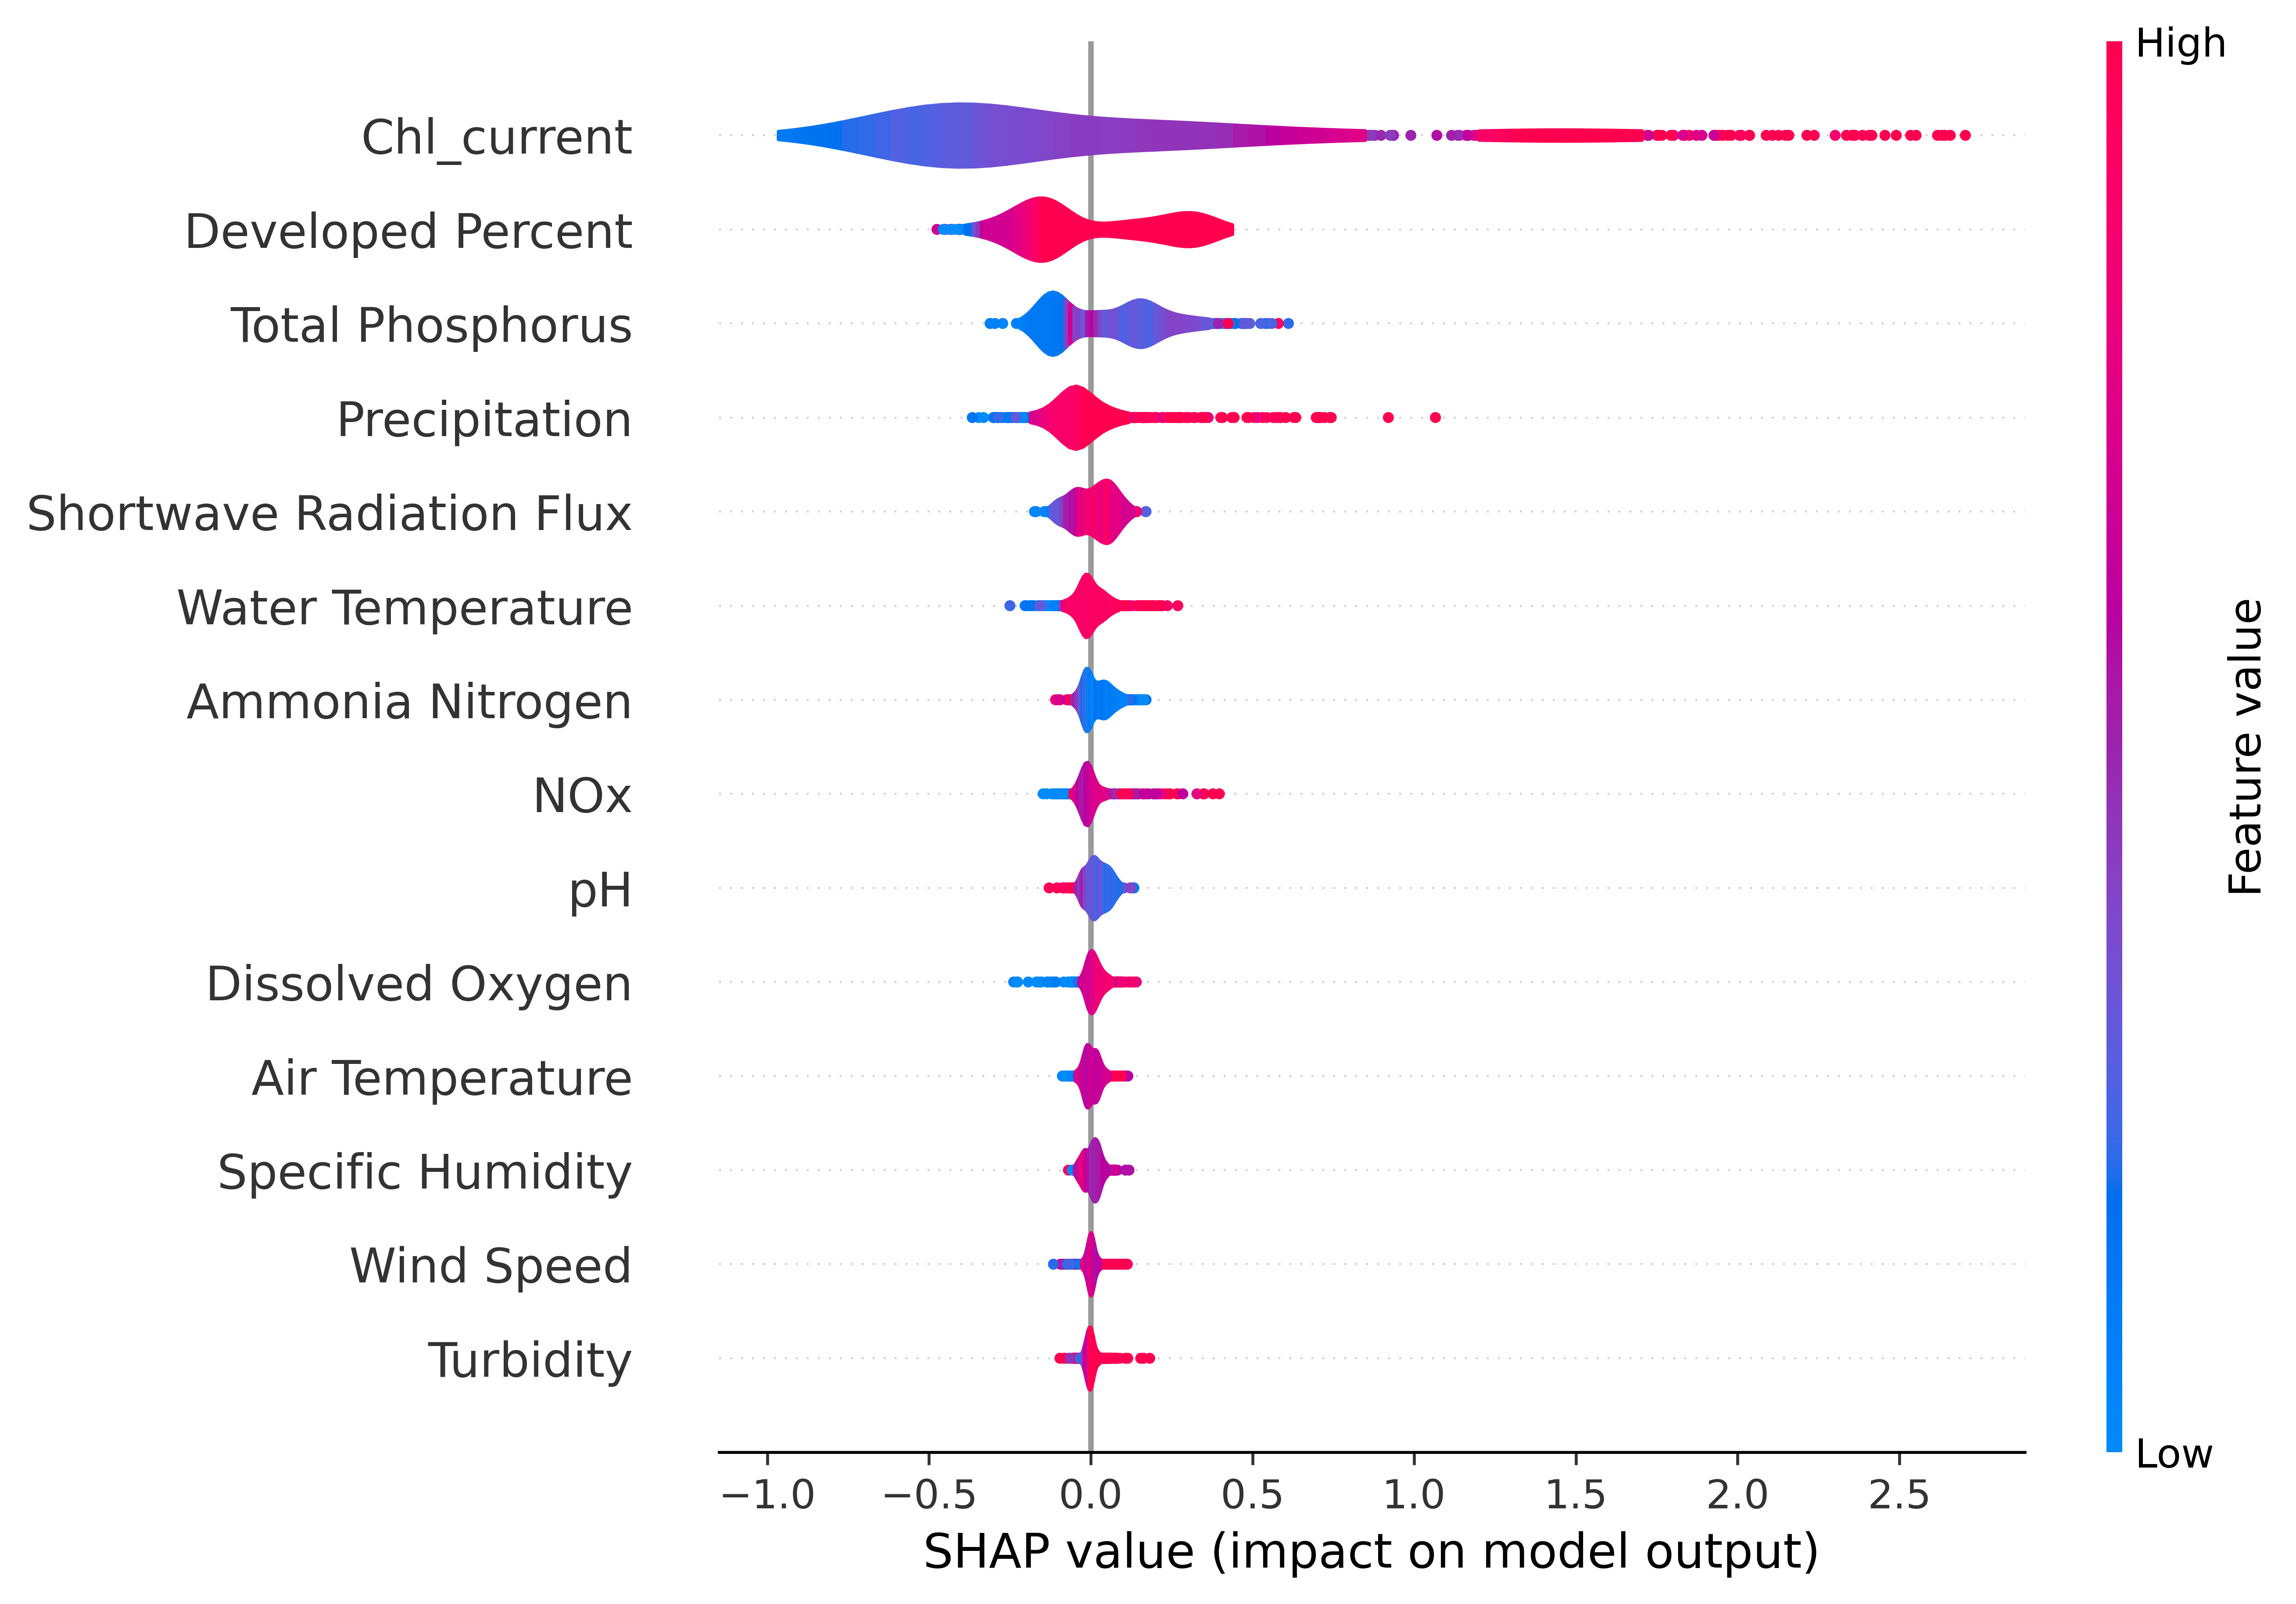

In [28]:
import shap
explainer = shap.TreeExplainer(RFR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [29]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Chl_current,0.601429
13,Developed Percent,0.207251
7,Total Phosphorus,0.150719
11,Precipitation,0.102844
12,Shortwave Radiation Flux,0.055264
5,Water Temperature,0.044395
1,Ammonia Nitrogen,0.037632
2,NOx,0.03357
4,pH,0.032844
3,Dissolved Oxygen,0.02472


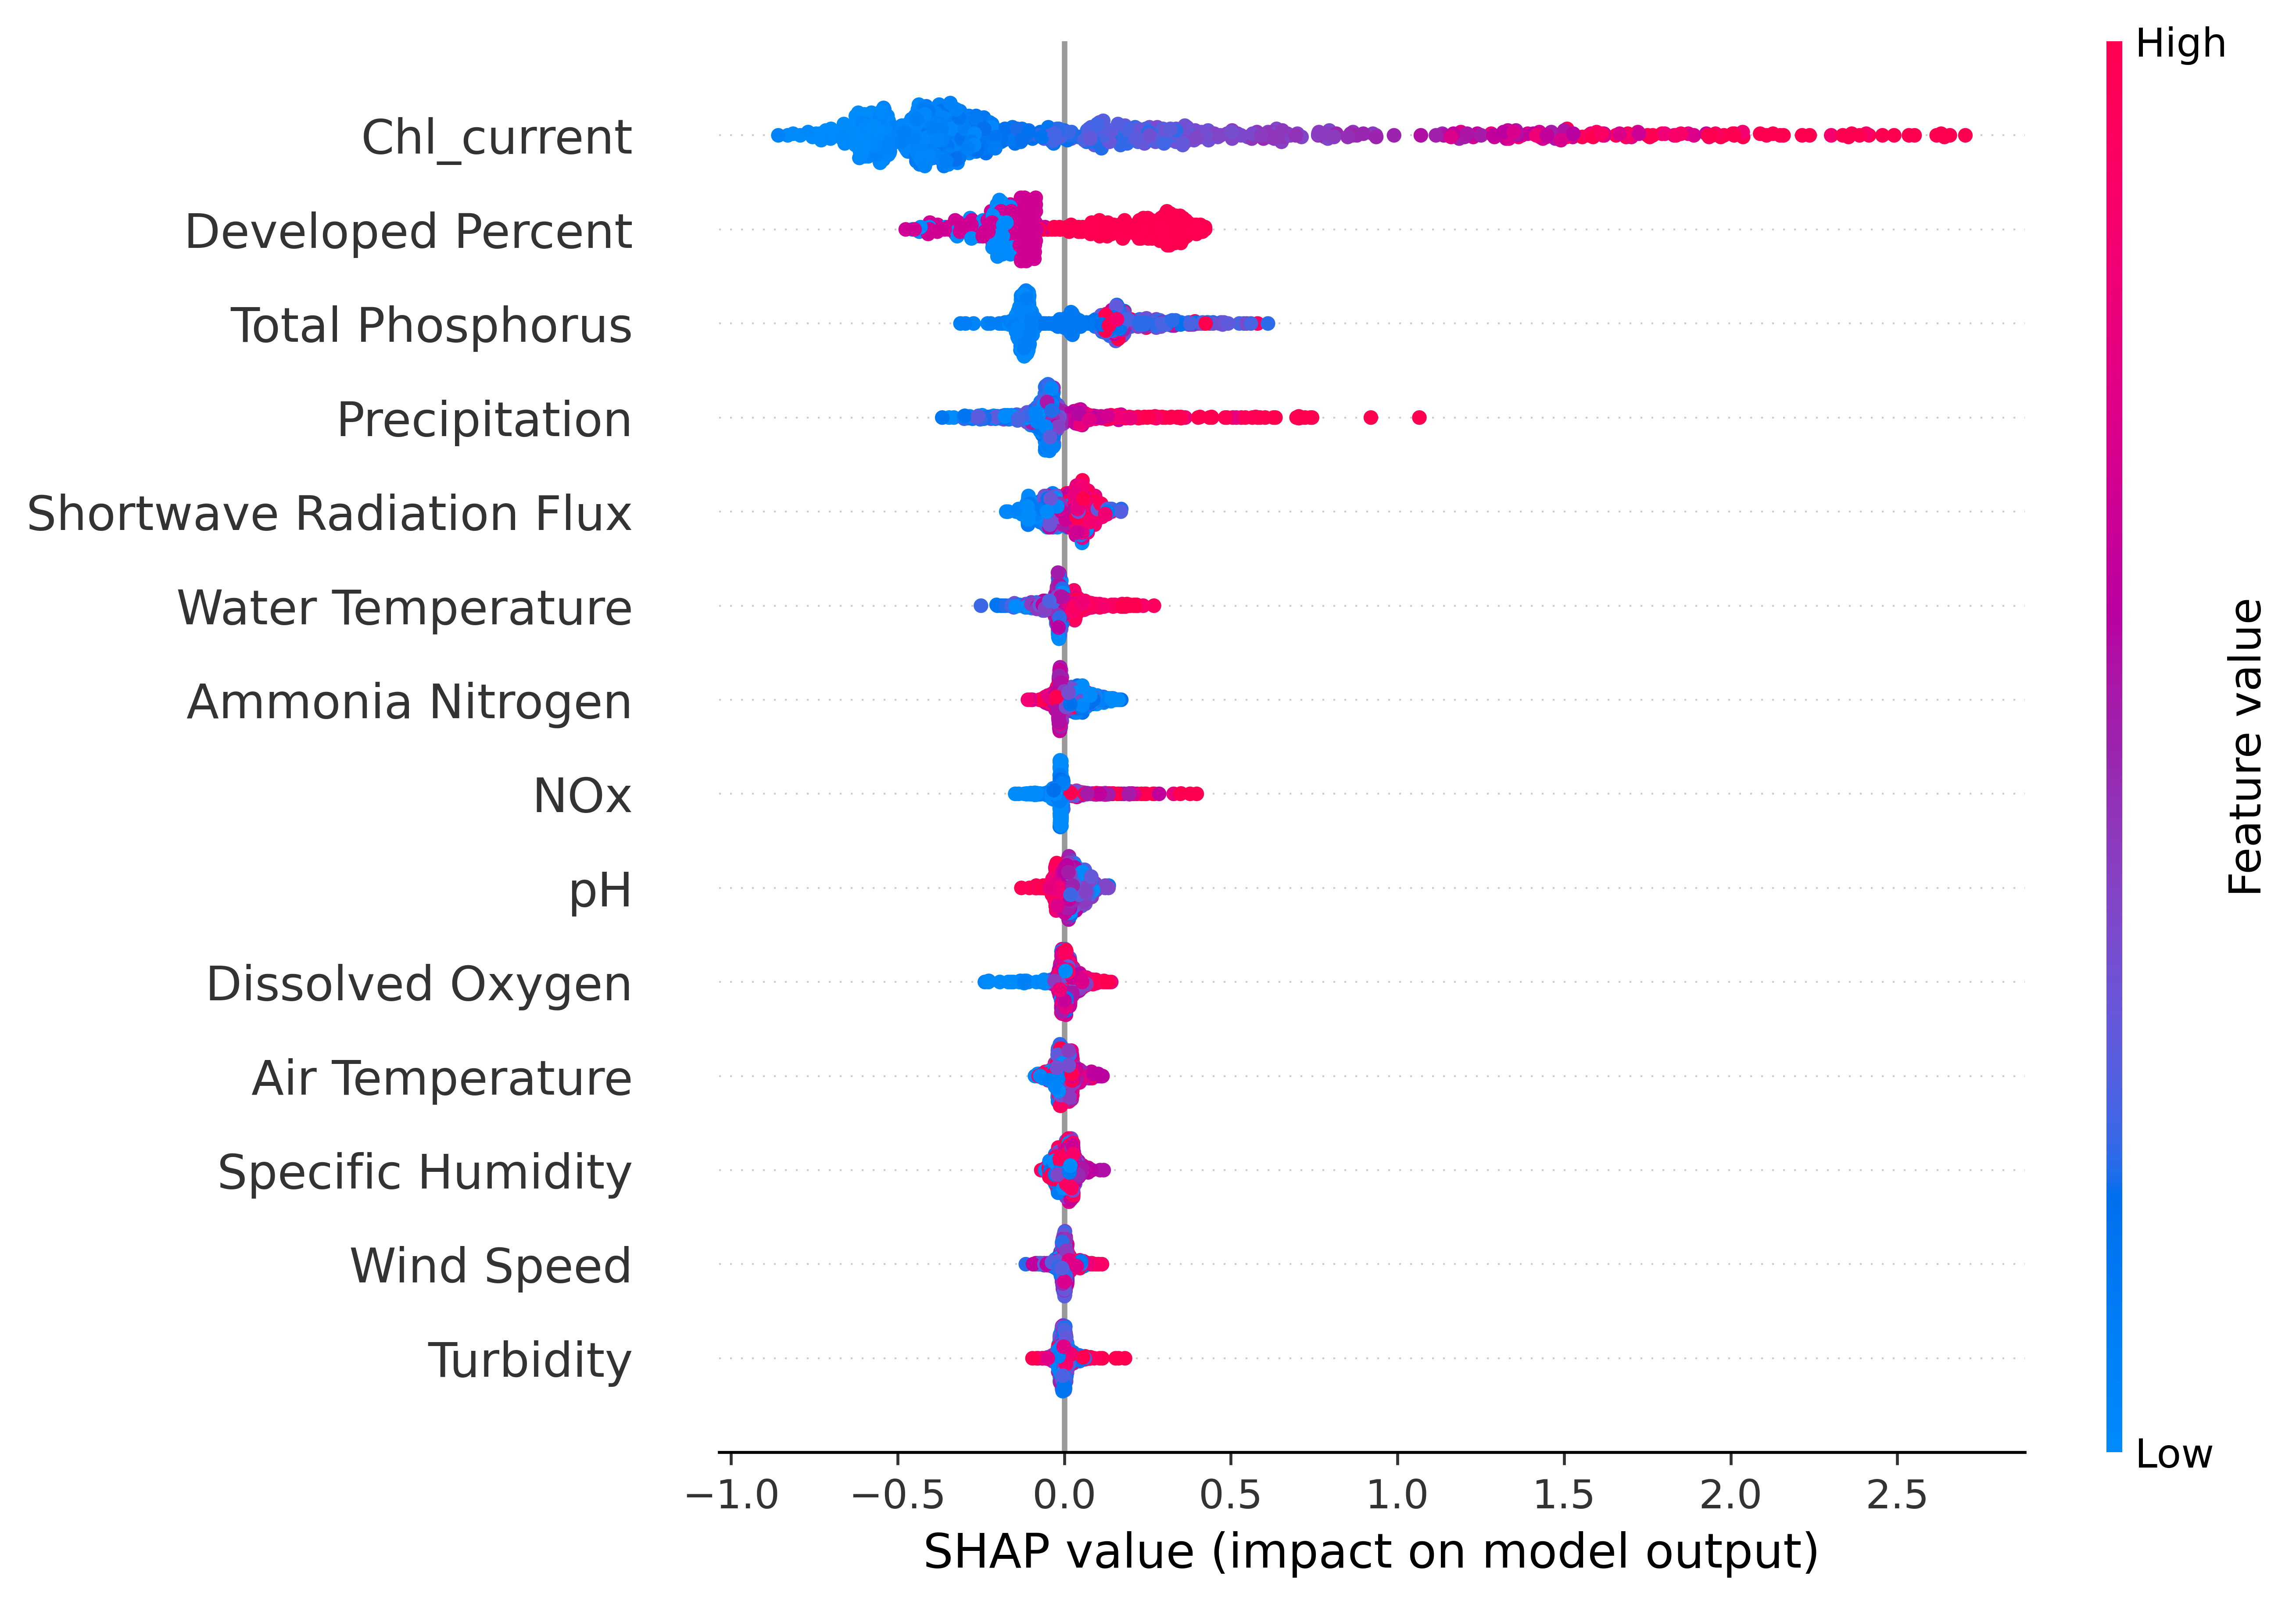

In [30]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [31]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [32]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,2.576821
1,2.860000,2.756512
2,3.692863,2.667013
3,5.130000,3.649081
4,3.646510,2.928369
...,...,...
2731,0.860000,1.355336
2732,0.460000,0.719067
2733,0.540000,0.555845
2734,0.210000,0.608539


In [33]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [34]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_1m_lag,Predicted Chlorophyll-a
2736,6.830000,3.694998
2737,4.349878,3.837126
2738,2.740000,3.131888
2739,2.210000,2.768441
2740,3.870000,2.724166
...,...,...
3451,0.480000,0.816805
3452,0.630000,0.790419
3453,0.930000,0.892498
3454,0.650000,0.810117


In [35]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,2.576821
1,2.860000,2.756512
2,3.692863,2.667013
3,5.130000,3.649081
4,3.646510,2.928369
...,...,...
3451,0.480000,0.816805
3452,0.630000,0.790419
3453,0.930000,0.892498
3454,0.650000,0.810117


In [36]:
All_Y.loc[0]

Chl_1m_lag                 3.759632
Predicted Chlorophyll-a    2.576821
Name: 0, dtype: float64

In [37]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [38]:
import os
import joblib
joblib.dump(RFR, "./RFR_lag.joblib")

['./RFR_lag.joblib']

In [39]:
import os
import joblib
loaded_rfr = joblib.load("./RFR_lag.joblib")

In [40]:
# original
aaaa = loaded_rfr.predict(x)

In [41]:
aaaa

array([2.57682107, 2.75651168, 2.66701297, ..., 0.89249768, 0.81011671,
       0.64010261])

In [343]:
len(aaaa)

3456